In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

In [25]:
# Tarefas:

# 1. Análise exploratória de dados: Faça uma análise exploratória dos dados para entender a
#    distribuição das variáveis e identificar possíveis correlações entre elas.

In [26]:
sample = pd.read_csv("sample_submission.csv")
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [27]:
sample.describe()

,Id,SalePrice
count,1459.000000,1459.000000
mean,2190.000000,179183.918243
std,421.321334,16518.303051
min,1461.000000,135751.318893
25%,1825.500000,168703.011202
50%,2190.000000,179208.665698
75%,2554.500000,186789.409363
max,2919.000000,281643.976117


In [28]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [29]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
Id           1459 non-null int64
SalePrice    1459 non-null float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [19]:
# Ao usar o comando .describe() e .info() verificamos as variáveis presentes, quais delas são númericas/categoricas e se existem
# valores que não existem ou outliers.

In [12]:
# Continuando a analise:

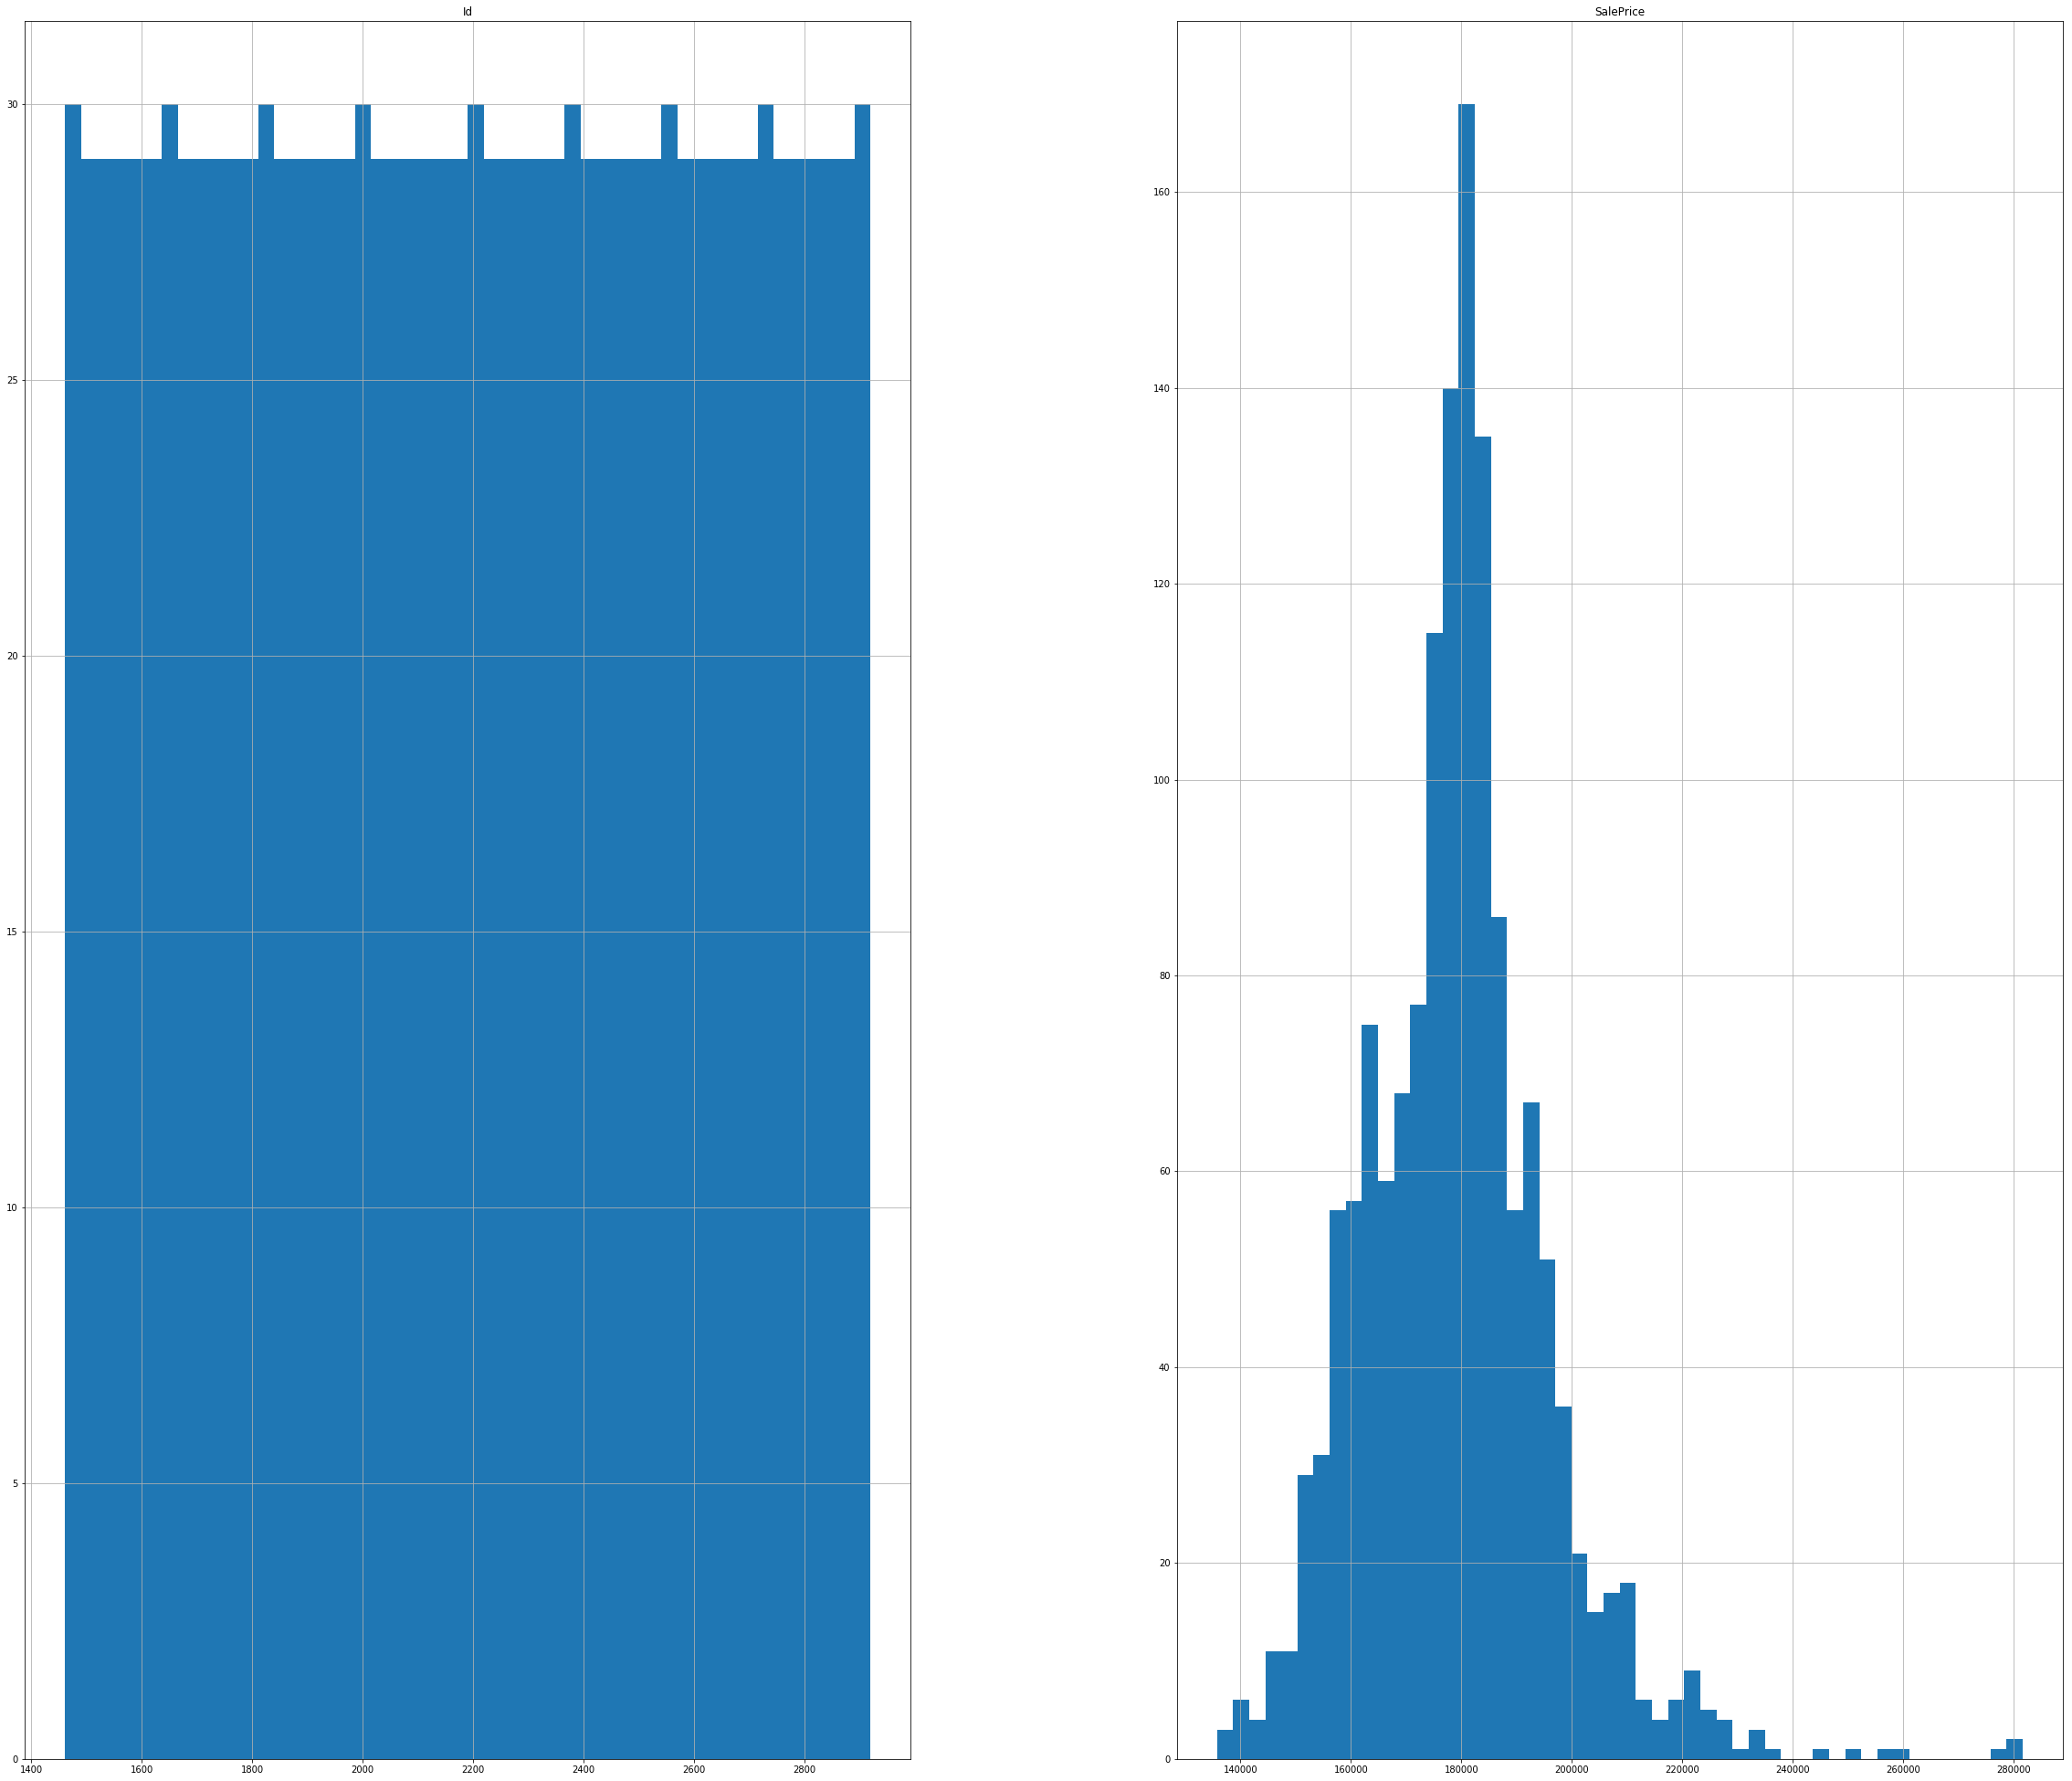

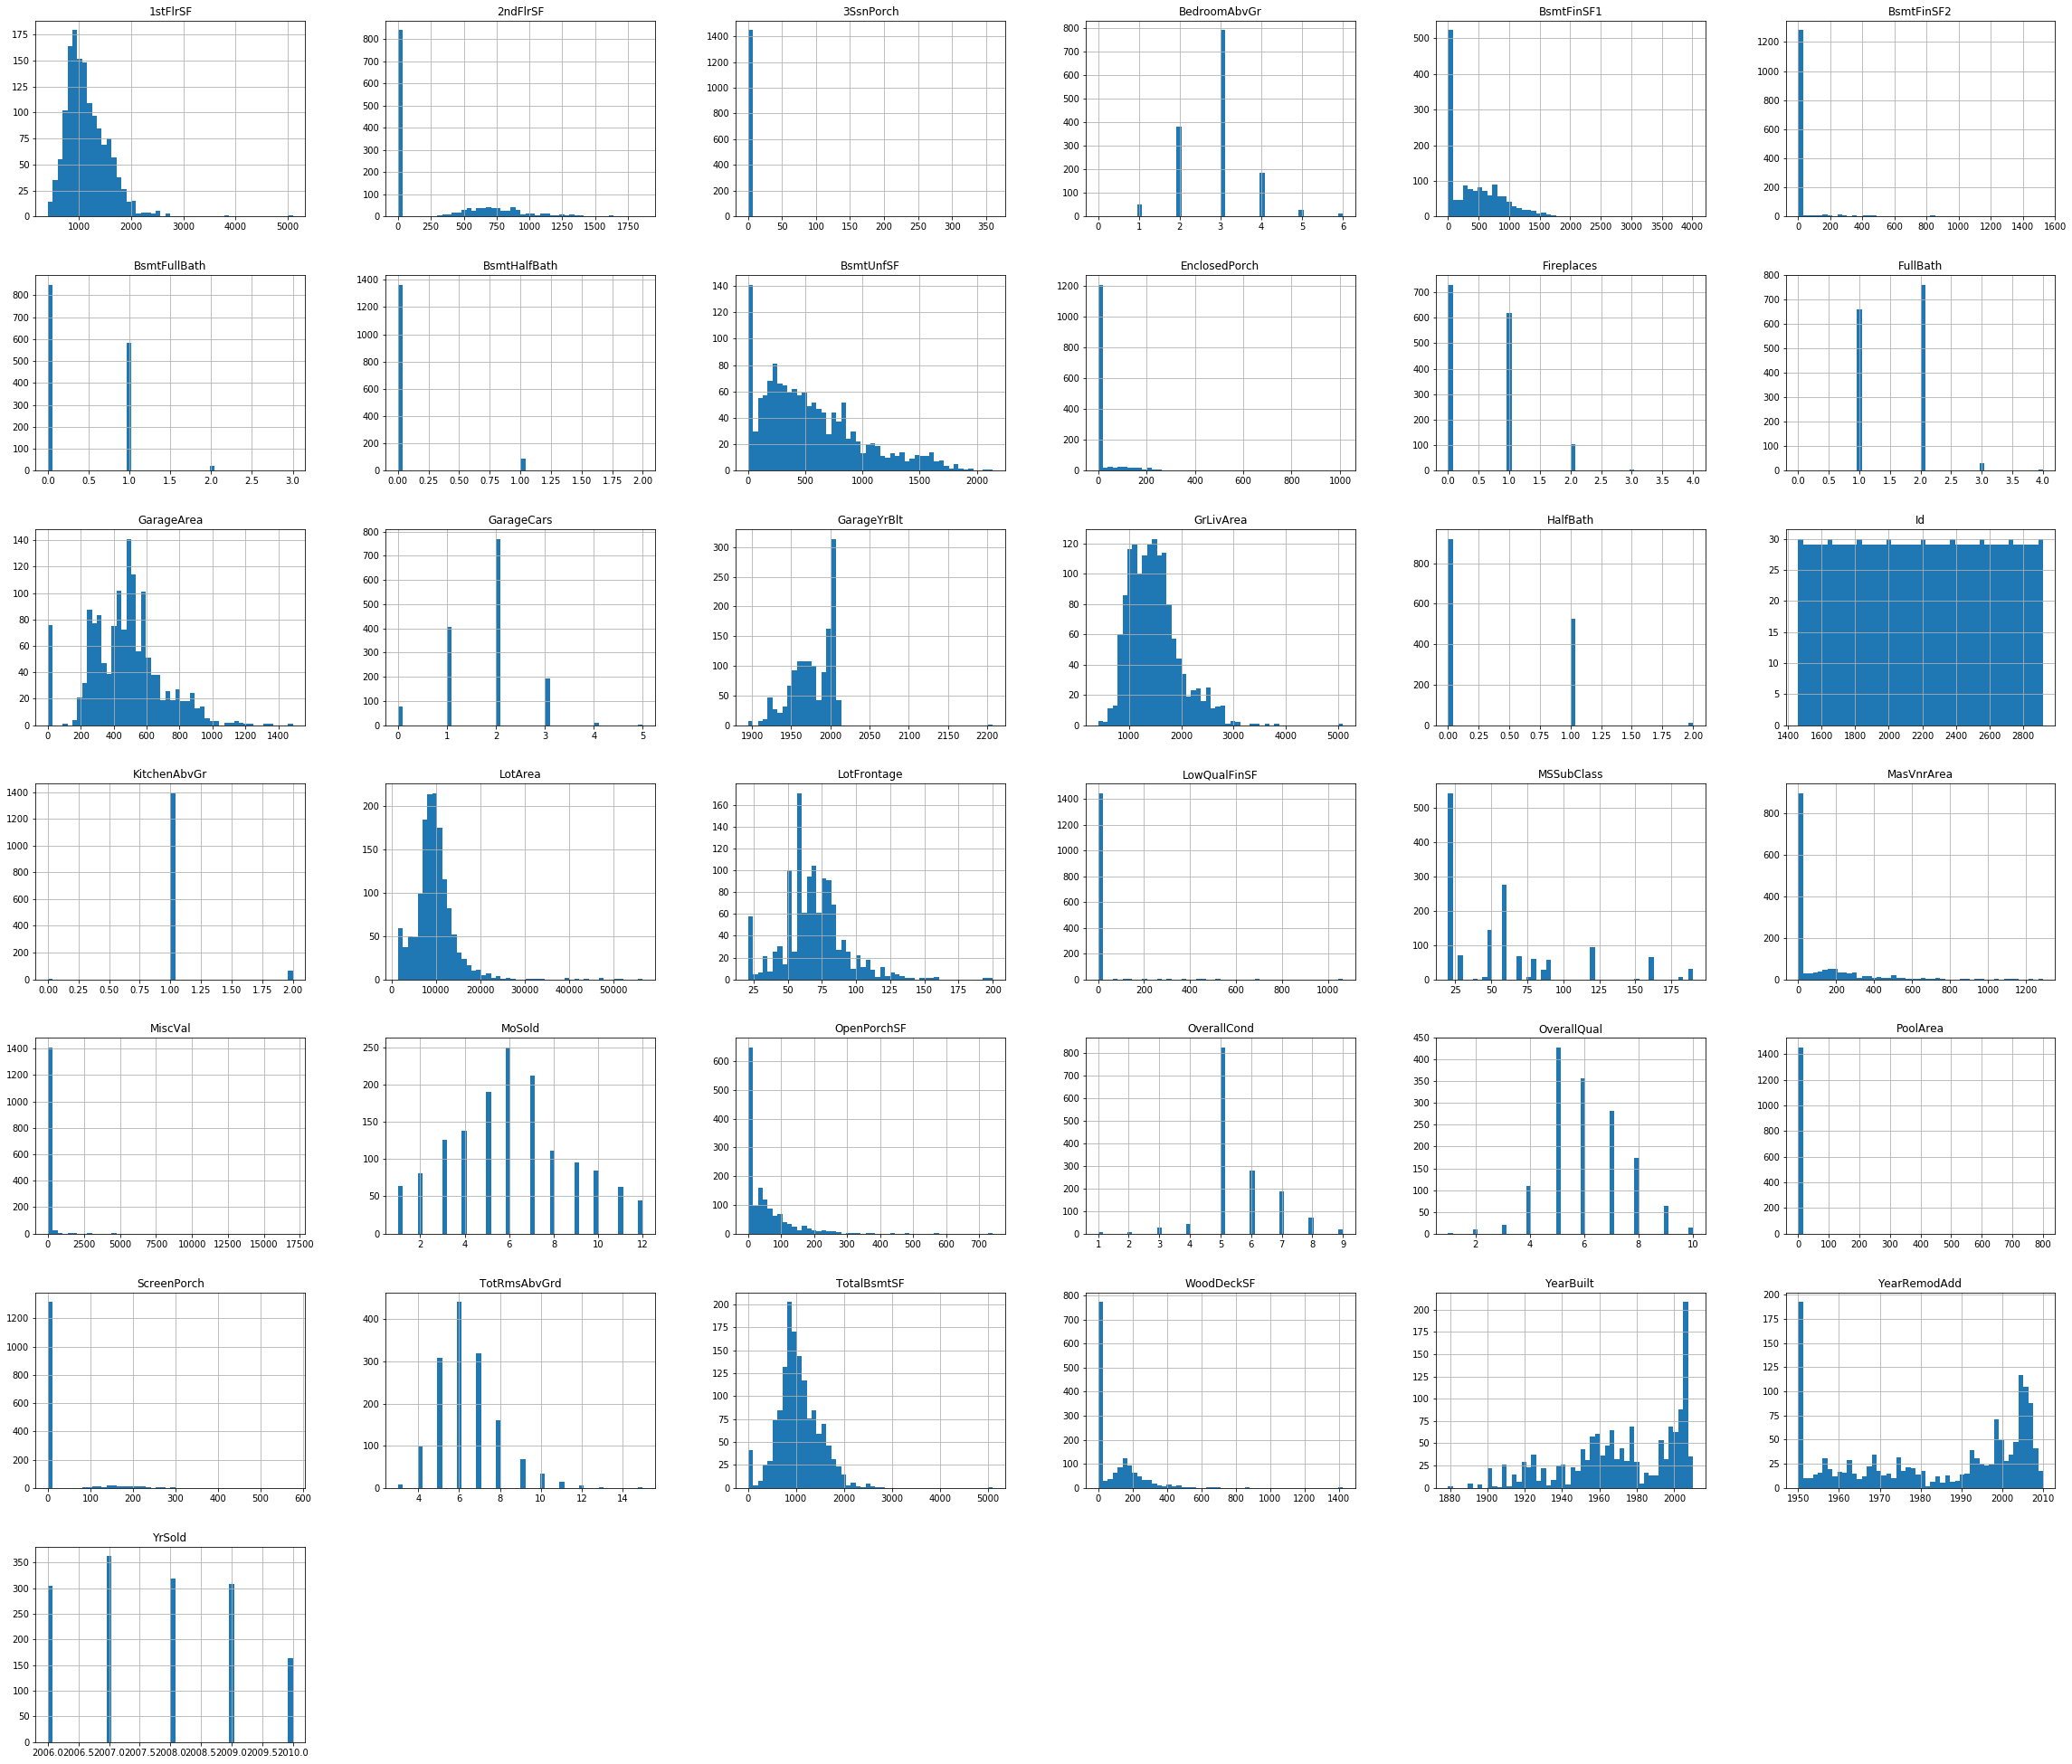

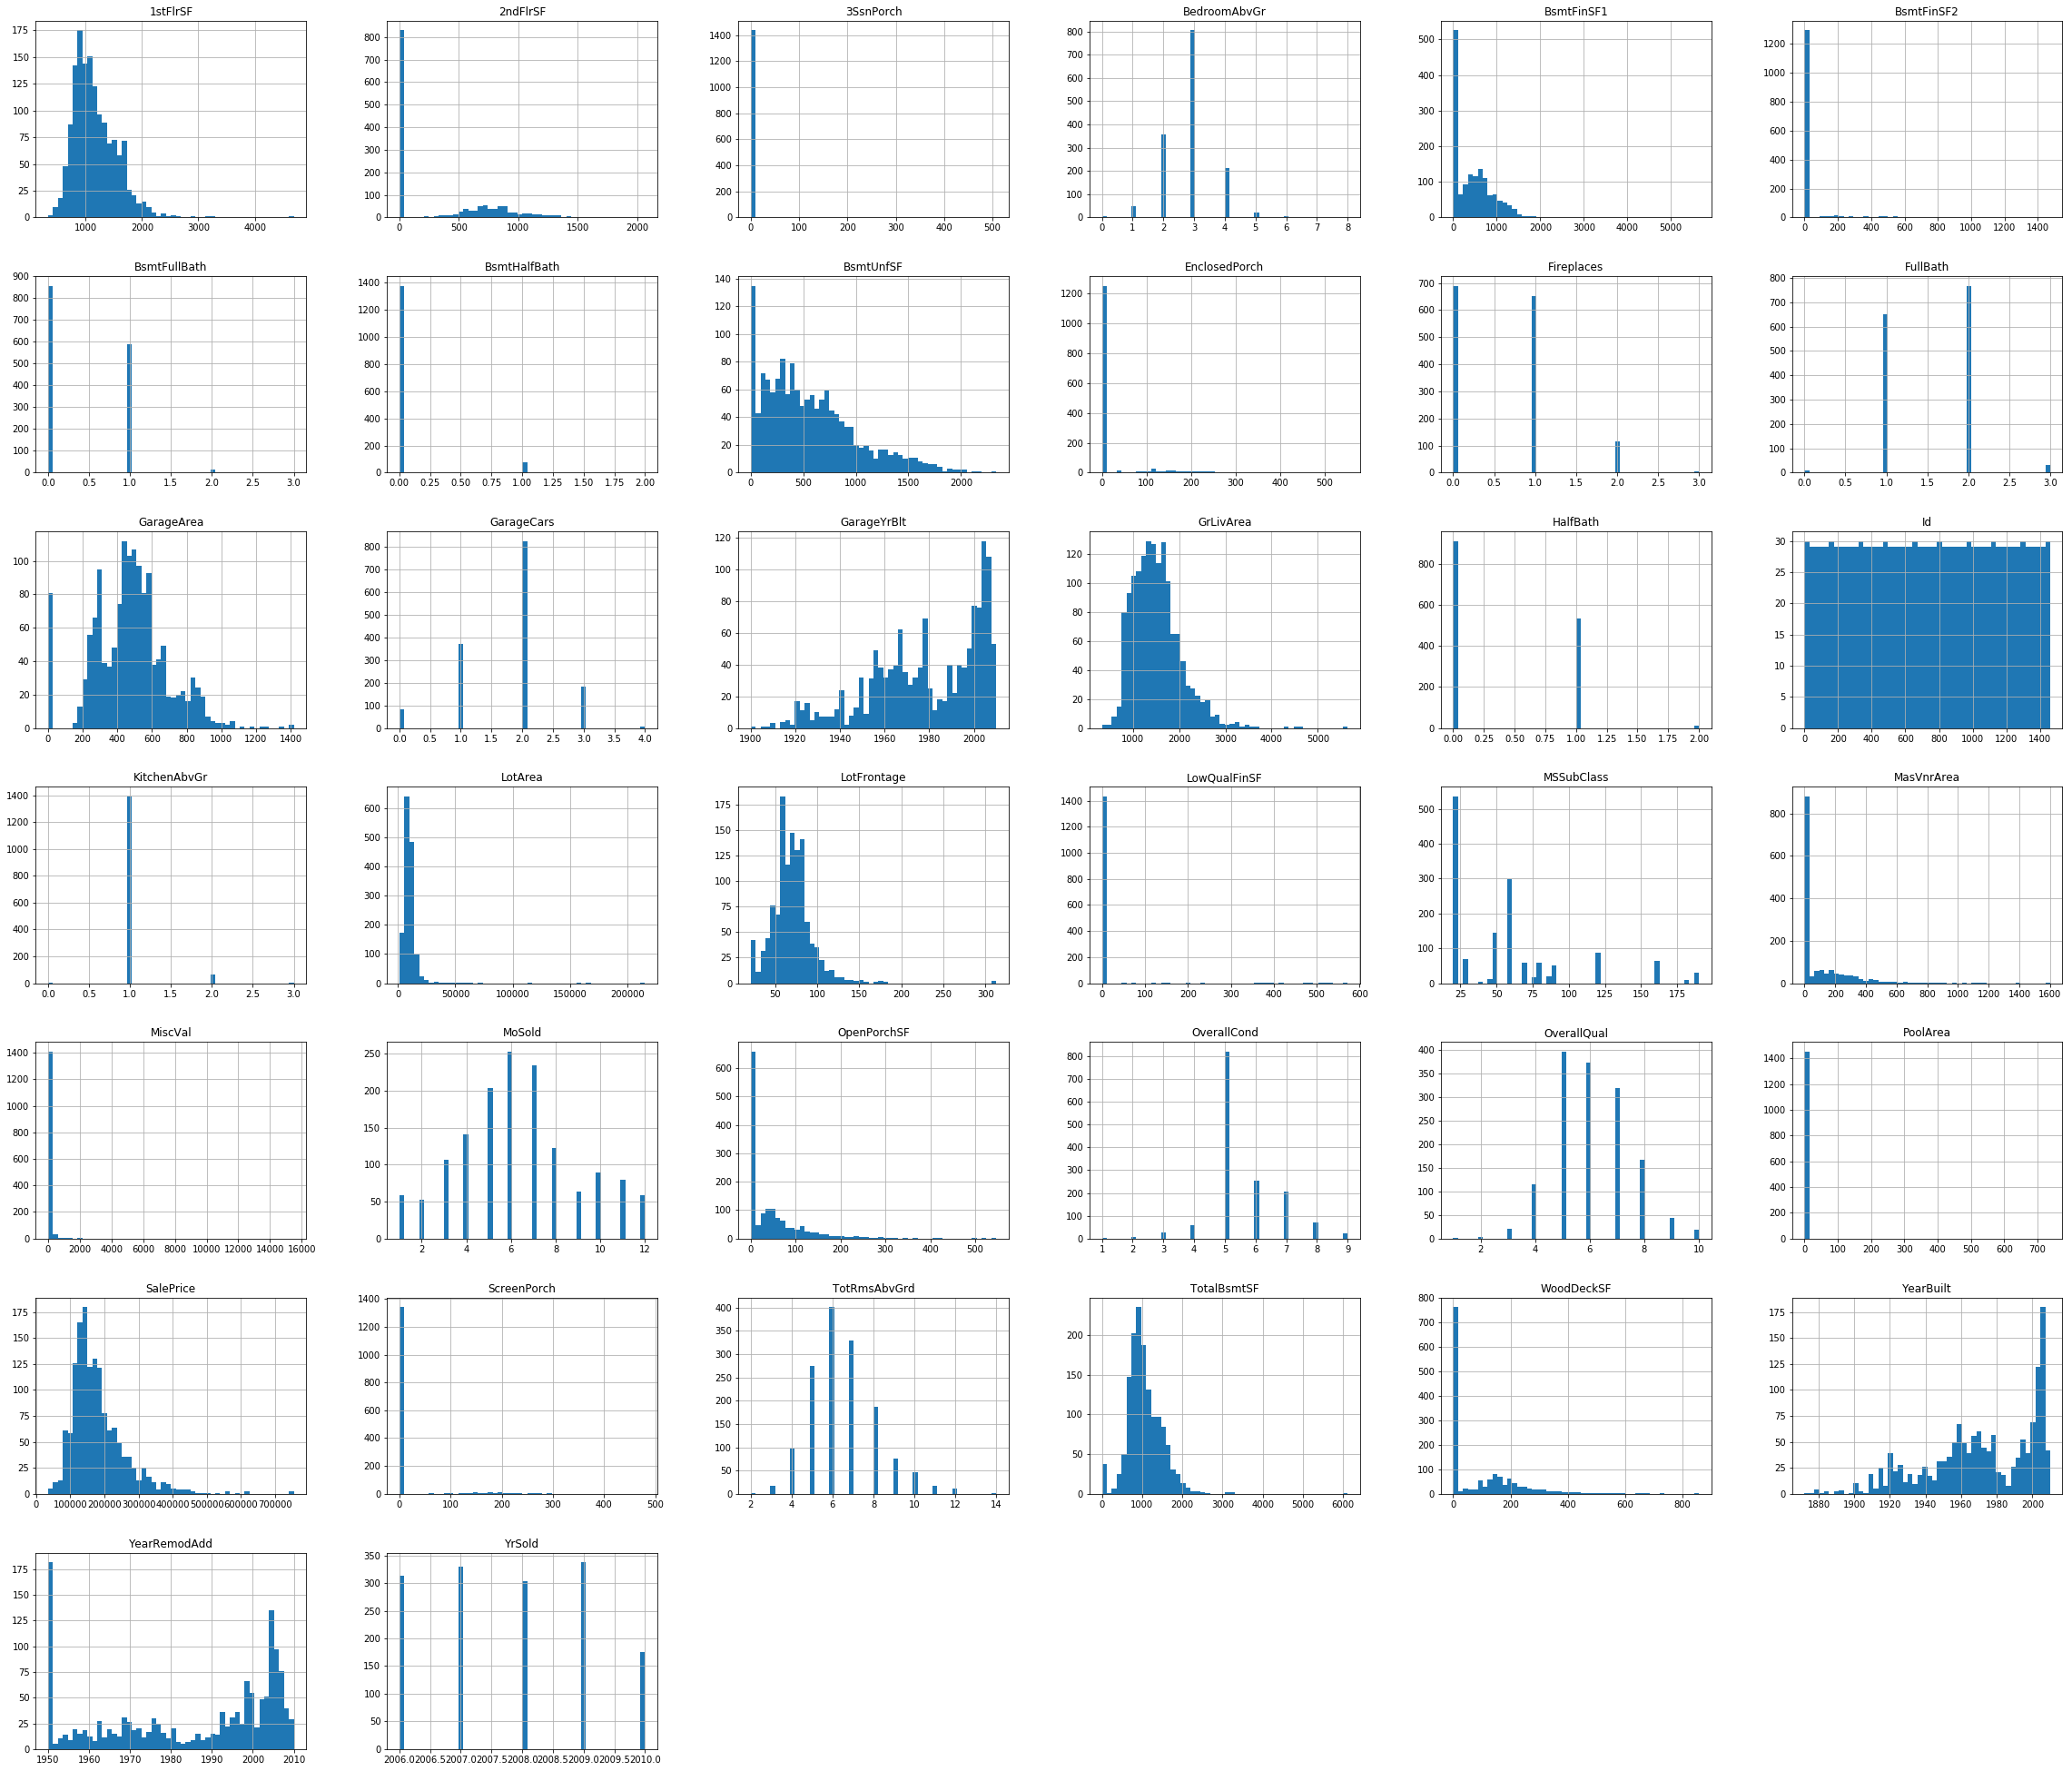

In [13]:
Data_list = [sample,test,train]

# Histogramas para todas as variáveis numéricas:
for i, df in enumerate(Data_list, 1):
    df.hist(bins=50, figsize=(40,35))
    plt.show()

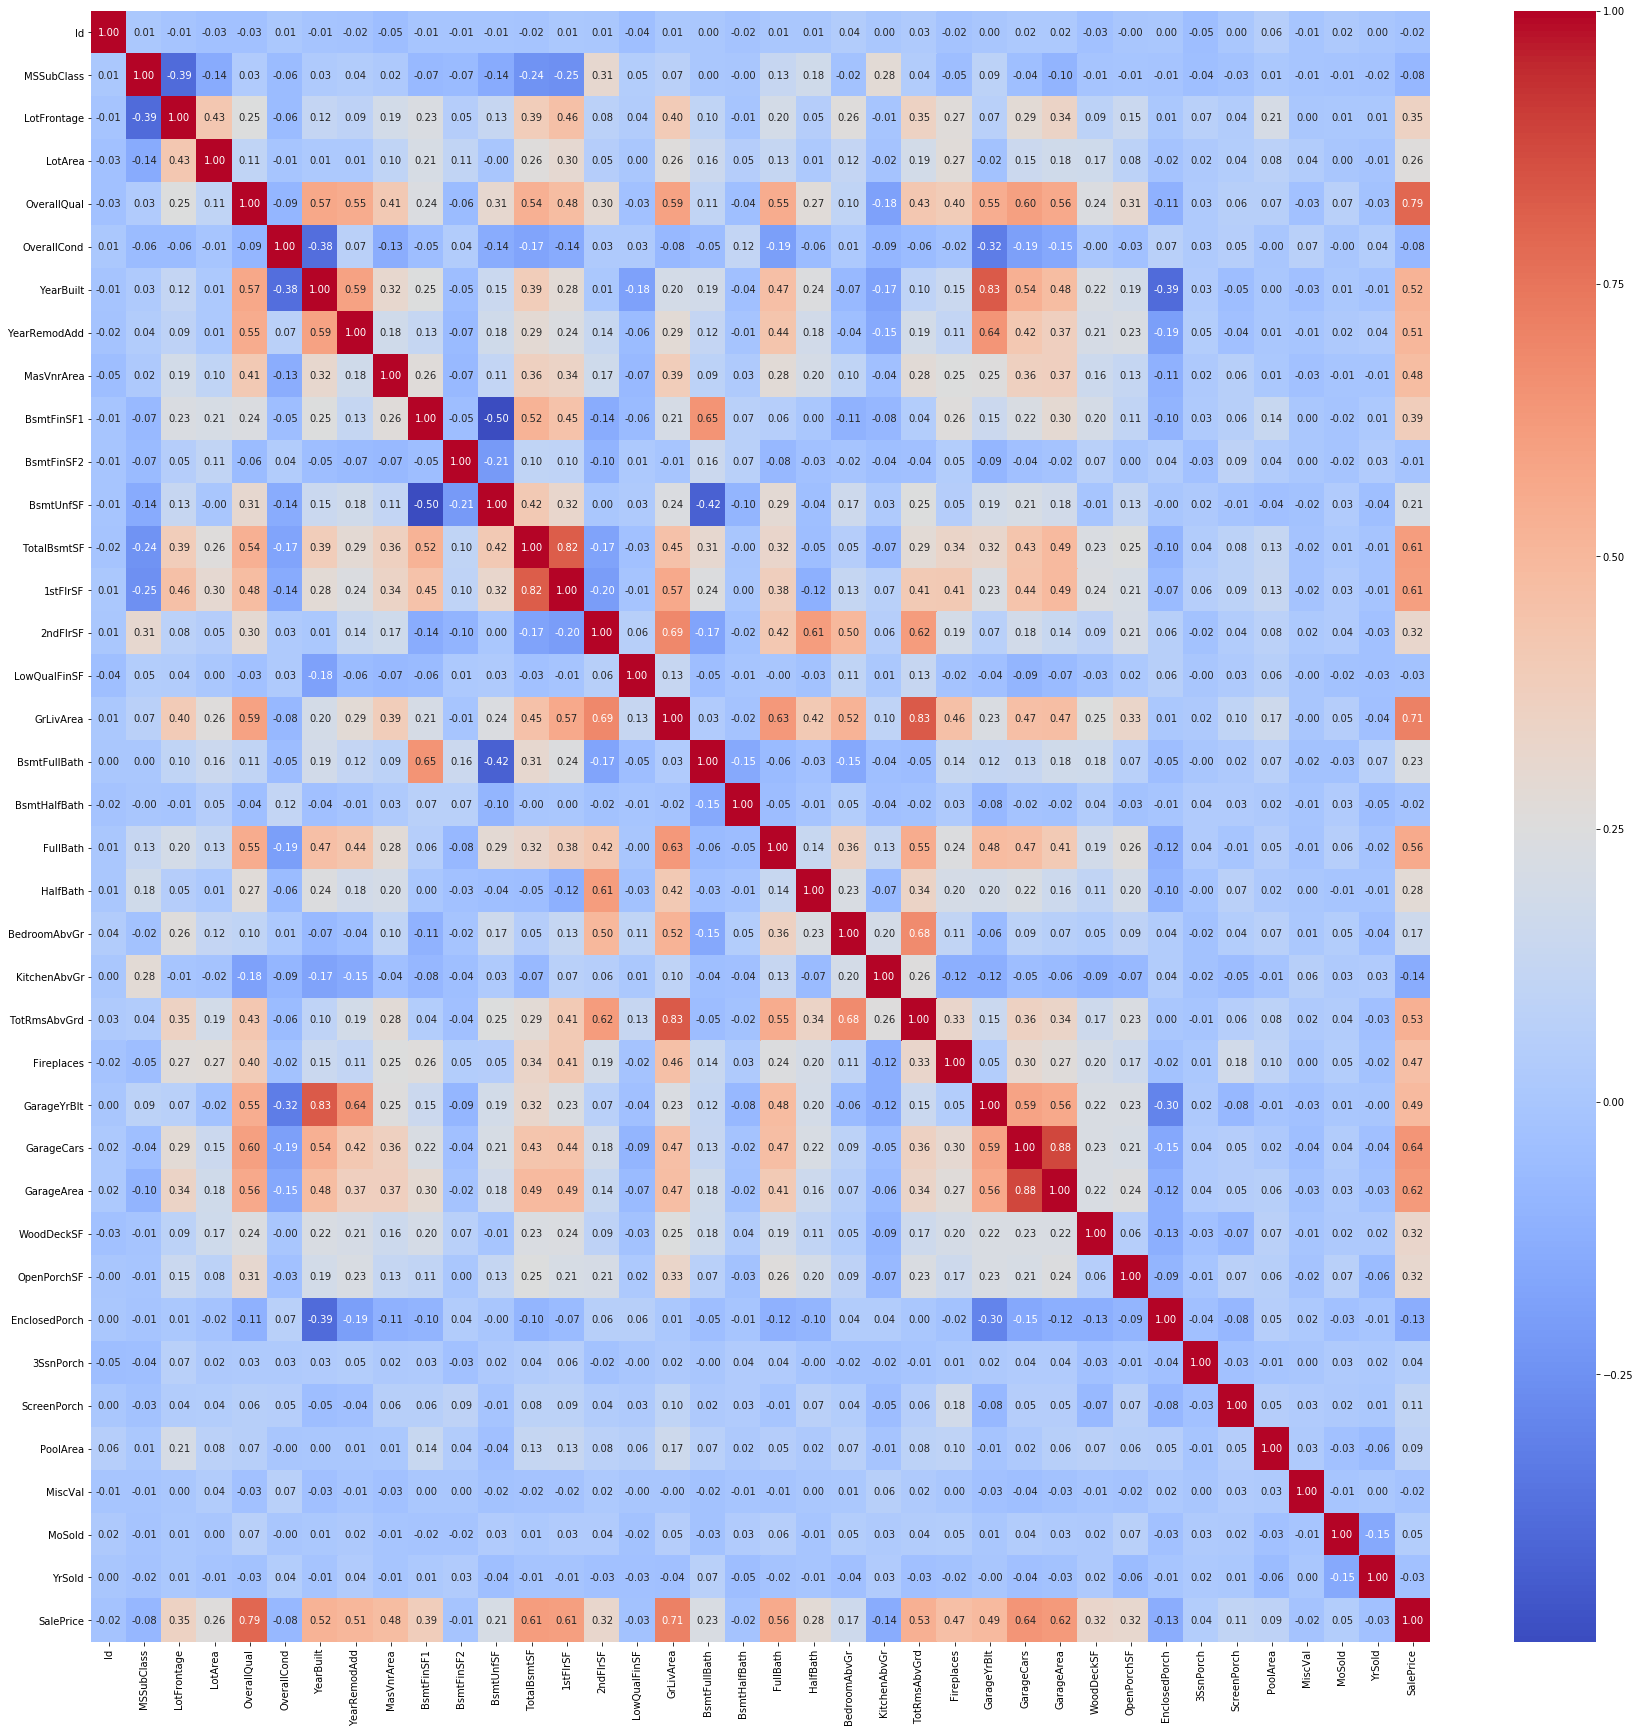

In [22]:
# Matriz de correlação
corr_matrix = df.corr()

plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.xticks(rotation=90)
plt.show()

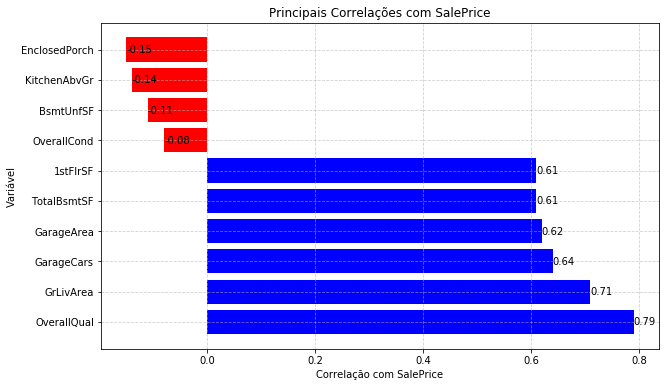

In [28]:
# Grafico sobre o SalePrice da matriz de corelação acima
variables = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'EnclosedPorch', 'KitchenAbvGr', 'BsmtUnfSF', 'OverallCond']
correlations = [0.79, 0.71, 0.64, 0.62, 0.61, 0.61, -0.15, -0.14, -0.11, -0.08]

data = {'Variable': variables, 'Correlation': correlations}
df_corr = pd.DataFrame(data)

df_corr = df_corr.sort_values(by='Correlation', ascending=False)

plt.figure(figsize=(10,6))
bars = plt.barh(df_corr['Variable'], df_corr['Correlation'], color=['blue' if x > 0 else 'red' for x in df_corr['Correlation']])
plt.xlabel('Correlação com SalePrice')
plt.ylabel('Variável')
plt.title('Principais Correlações com SalePrice')
plt.grid(True, linestyle='--', alpha=0.6)

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', va='center', ha='left')

plt.show()

In [14]:
# Principais Correlações Positivas com SalePrice:
# OverallQual: 0.79
# GrLivArea: 0.71
# GarageCars: 0.64
# GarageArea: 0.62
# TotalBsmtSF: 0.61
# 1stFlrSF: 0.61

# Principais Correlações Negativas com SalePrice:
# EnclosedPorch: -0.15
# KitchenAbvGr: -0.14
# BsmtUnfSF: -0.11
# OverallCond: -0.08

In [15]:
# 2. Featuring Engineering: Realize a engenharia de características para selecionar as variáveis mais
# importantes para o modelo de regressão.

Mean Squared Error (MSE): 2681026163.509091
R-squared (R2): 0.6504677778896862


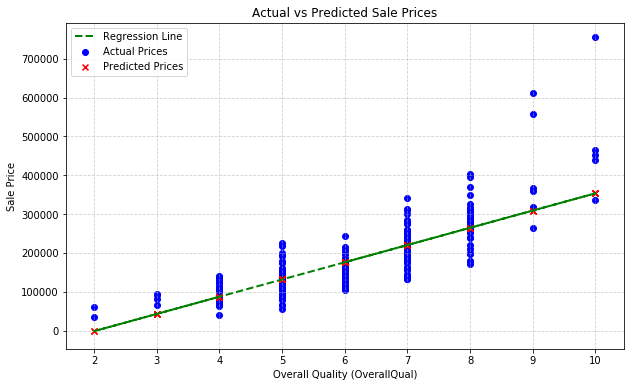

In [43]:
df = pd.read_csv('train.csv')

X = df[['OverallQual']]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

plt.figure(figsize=(10,6))

plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.scatter(X_test, y_pred, color='red', marker='x', label='Predicted Prices')

plt.plot(X_test, y_pred, color='green', linestyle='--', linewidth=2, label='Regression Line')

plt.xlabel('Overall Quality (OverallQual)')
plt.ylabel('Sale Price')
plt.title('Actual vs Predicted Sale Prices')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [45]:
features = ['OverallQual']

X = df[features]
y = df['SalePrice']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

      35311       0.00      0.00      0.00         1
      40000       0.00      0.00      0.00         1
      55993       0.00      0.00      0.00         1
      60000       0.00      0.00      0.00         1
      64500       0.00      0.00      0.00         1
      66500       0.00      0.00      0.00         1
      67000       0.00      0.00      0.00         2
      68400       0.00      0.00      0.00         1
      68500       0.00      0.00      0.00         1
      75000       0.00      0.00      0.00         1
      75500       0.00      0.00      0.00         1
      79500       0.00      0.00      0.00         1
      81000       0.00      0.00      0.00         1
      84500       0.00      0.00      0.00         1
      84900       0.00      0.00      0.00         1
      85000       0.00      0.00      0.00         1
      86000       0.00      0.00      0.00         2
      89471       0.00      0.00      0.00   

D:\Users\guilh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [39]:
# Converter a variável de saída em uma variável binária
# Considerar como "alto" as casas com preço de venda acima da mediana
median_price = train['SalePrice'].median()
train['HighPrice'] = (train['SalePrice'] > median_price).astype(int)

In [40]:
# Selecionar as features e a variável alvo
features = train.drop(columns=['SalePrice', 'HighPrice', 'Id'])
target = train['HighPrice']

In [41]:
# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [42]:
# Identificar colunas numéricas e categóricas
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

In [43]:
# Construir transformadores para colunas numéricas e categóricas
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [44]:
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [45]:
# Combinar transformadores usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

In [46]:
# Construir pipeline de treinamento com pré-processador e modelo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [47]:
# Treinar o modelo
model.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'L...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('classifier', LogisticRegression())])

In [48]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

In [49]:
# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

In [50]:
# Exibir os resultados
accuracy, classification_rep, confusion_mat

(0.958904109589041,
 '              precision    recall  f1-score   support\n\n           0       0.99      0.94      0.96       161\n           1       0.93      0.98      0.96       131\n\n    accuracy                           0.96       292\n   macro avg       0.96      0.96      0.96       292\nweighted avg       0.96      0.96      0.96       292\n',
 array([[151,  10],
        [  2, 129]], dtype=int64))